TASK-1


Most Common Rating Range: 0.0
Average Number of Votes: 156.909747670401


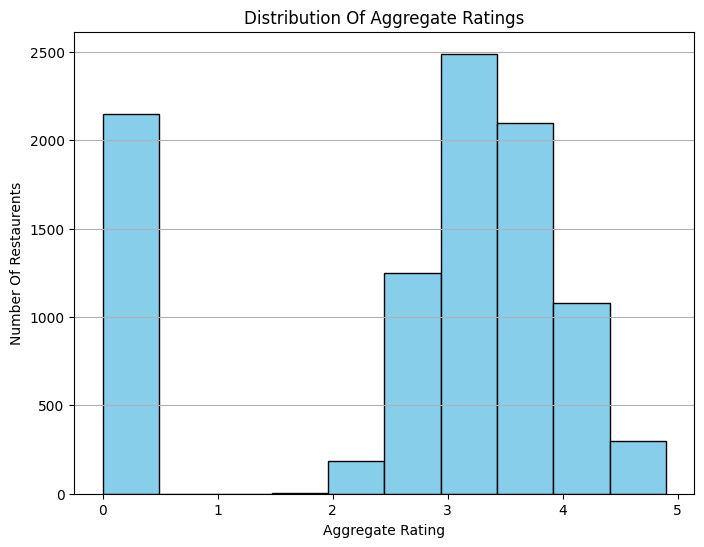

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
d=pd.read_csv('Dataset.csv')
plt.figure(figsize=(8,6))
plt.hist(d['Aggregate rating'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number Of Restaurents')
plt.title('Distribution Of Aggregate Ratings')
plt.grid(axis='y')

most_rating_range=d['Aggregate rating'].mode()[0]

avg_votes=d['Votes'].mean()

print("Most Common Rating Range:",most_rating_range)
print("Average Number of Votes:",avg_votes)
plt.show()

TASK-2


In [ ]:
import pandas as pd
d=pd.read_csv('Dataset.csv')
cuis_ratings=d[['Cuisines','Aggregate rating']].dropna()

cuis_combi=cuis_ratings['Cuisines'].str.split(',')
cuis_combi=cuis_combi.apply(lambda a: tuple(sorted(a)))
comm_combi=cuis_combi.value_counts().head(10)

avg_ratings_per_combi=cuis_ratings.groupby('Cuisines')['Aggregate rating'].mean()

print("Most Common Cuisine Combinations:")
print(comm_combi)

print("\nAvg rating for Cuisine Combinations:")
for combi,count in comm_combi.items():
  combi_str=', '.join(combi)
  print(f"Cuisines: {combi_str} | Count:{count} | Average Rating: {average_rating:.2f}")



Most Common Cuisine Combinations:
(North Indian,)                       936
( Chinese, North Indian)              511
(Fast Food,)                          354
(Chinese,)                            354
( Mughlai, North Indian)              334
(Cafe,)                               299
( Chinese,  Mughlai, North Indian)    267
(Bakery,)                             218
( Desserts, Bakery)                   170
(Street Food,)                        149
Name: Cuisines, dtype: int64

Avg rating for Cuisine Combinations:
Cuisines: North Indian | Count:936 | Average Rating: 1.67
Cuisines:  Chinese, North Indian | Count:511 | Average Rating: 1.67
Cuisines: Fast Food | Count:354 | Average Rating: 1.67
Cuisines: Chinese | Count:354 | Average Rating: 1.67
Cuisines:  Mughlai, North Indian | Count:334 | Average Rating: 1.67
Cuisines: Cafe | Count:299 | Average Rating: 1.67
Cuisines:  Chinese,  Mughlai, North Indian | Count:267 | Average Rating: 1.67
Cuisines: Bakery | Count:218 | Average Rating: 1.

TASK-3

In [ ]:
import pandas as pd
import folium
d=pd.read_csv('Dataset.csv')

map_center=[d['Latitude'].mean(),d['Longitude'].mean()]

restaurant_map= folium.Map(location=map_center,zoom_start=12)

for index,row in d.iterrows():
  folium.Marker([row['Latitude'],row['Longitude']],popup=row['Restaurant Name']).add_to(restaurant_map)

restaurant_map.save('restaurant_map.html')

TASK-4

In [6]:
import pandas as pd
d=pd.read_csv('Dataset.csv')

chain_groups=d.groupby('Restaurant Name')
chain_names=[]
chain_avg_ratings=[]
chain_total_votes=[]
chain_num_locations=[]

for chain_name,group in chain_groups:
  num_locations=len(group)
  avg_rating=group['Aggregate rating'].mean()
  total_votes=group['Votes'].sum()

  chain_names.append(chain_name)
  chain_avg_ratings.append(avg_rating)
  chain_total_votes.append(total_votes)
  chain_num_locations.append(num_locations)

chain_stats=pd.DataFrame({
    'Chain Name': chain_names,
    'Average Rating': chain_avg_ratings,
    'Total Votes': chain_total_votes,
    'Number of Locations': chain_num_locations
})
print("Chain Statistics:")
print(chain_stats.sort_values(by='Number of Locations',ascending=False))

Chain Statistics:
                                   Chain Name  Average Rating  Total Votes  \
1098                          Cafe Coffee Day        2.419277         2428   
2098                           Domino's Pizza        2.740506         6643   
6106                                   Subway        2.907937         6124   
2716                         Green Chick Chop        2.672549          964   
4077                               McDonald's        3.339583         5291   
...                                       ...             ...          ...   
2618                    Gian Ji Punjabi Dhaba        0.000000            0   
2617  Ghungroo Club & Bar - By Gautam Gambhir        3.800000          140   
2616                            Ghar Ki Handi        3.000000            6   
2615                             Ghar Ka Swad        0.000000            2   
7445                        �ukura��a Sofras۱        4.400000          296   

      Number of Locations  
1098             